<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto
Caderno de **Informações**<br>
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

# **Tópicos**

<ol type="1">
  <li>Criação da tabela e algumas queries;</li>
  <li>Links utéis;</li>
  <li>Dicas de livros, podcasts e outros;</li>
</ol>

# O PROJETO

Observação: Não há necessidade de entrega de exercício nessa fase.  O que vocês precisam fazer é o projeto!

**Crie um bloco de notas e insira o link do seu projeto para o tutor avaliar!**

Não esqueça de deixar o portfólio público! Você pode postar o link com uma pequena descrição nas suas redes sociais (Facebook, Linkedlin, Twitter, ...), prática altamente recomendável


---

# **1. Criação da tabela e algumas queries**



> **Não há necessidade de entrega**.
Para esses exercícios, utilizaremos os mesmo dados do módulo 3.

As informações de **credito8.csv** estarão disponíveis no material de aula.

Siga os seguintes passos para criação da tabela (desconsidere caso você já tenha os dados no seu S3):

* Crie uma pasta bucket-transacoes no seu S3 e carregue o arquivo **credito8.csv**
* Volta para o AWS Athena e execute o seguinte comando:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');
```

Utilizaremos a tabela para o projeto.

Abaixo vão algumas dicas de queries que podem ser utilizadas. Sugiro que crie novas, com outras funcionalidades não utilizadas aqui e faça novas perguntas para o dataset.

```sql
select * from credito limit 10;
```

```sql
select count(*) from credito
```
```sql
DESCRIBE credito
```

```sql
SELECT DISTINCT escolaridade FROM credito
```

```sql
select count(*), salario_anual from credito group by salario_anual
```

```sql
select count(*), sexo from credito group by sexo
```

```sql
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10
```

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo
```

```sql
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc
```

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

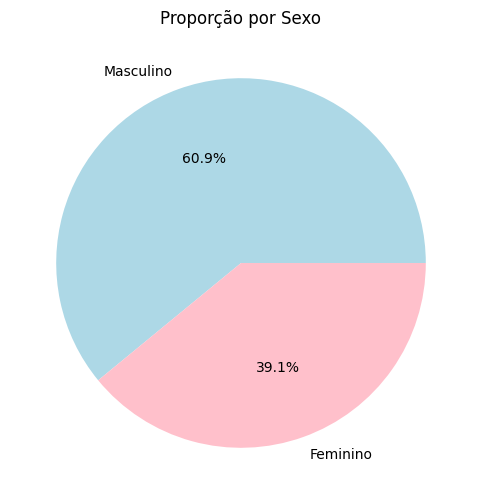

In [9]:
# Carregar o arquivo CSV
arquivo = 'credito8.csv'  # Substitua pelo caminho correto no seu Colab
df = pd.read_csv(arquivo)

# Definir os cabeçalhos manualmente
df.columns = ['Idade', 'Sexo', 'Educacao', 'Escolaridade', 'Estado Civil', 'Faixa Salarial', 'Cor',
              'Filhos', 'Tempo Emprego', 'Numero Cartoes', 'Limite', 'Saldo', 'Compras']

df['Sexo'] = df['Sexo'].replace({'M': 'Masculino', 'F': 'Feminino'})

# Contar a proporção de valores na coluna 'Sexo'
sexo_counts = df['Sexo'].value_counts()

# Gerar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Proporção por Sexo')
plt.show()

# **2. Links úteis**

* Kaggle: https://www.kaggle.com/
* Portfólio projeto: https://www.kaggle.com/marianeneiva/credit-eda-and-analysis
* Linkedlin: https://www.linkedin.com/feed/
* GitHub: https://github.com/
* Dados originais - gitHub André Perez: https://github.com/andre-marcos-perez/ebac-course-utils
* Imagens do gitHub - Mariane Neiva: https://github.com/marianeneiva/sqlEBAC
* AWS Athena: https://aws.amazon.com/pt/athena/?whats-new-cards.sort-by=item.additionalFields.postDateTime&whats-new-cards.sort-order=desc



# **3. Dicas de livros, podcasts e outros**

Livro data science para negócios: [aqui](https://www.amazon.com.br/Data-Science-para-neg%C3%B3cios-Fawcett/dp/8576089726)

Livro Storytelling with data: [aqui](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=pd_lpo_14_img_0/138-7561031-1469367?_encoding=UTF8&pd_rd_i=8550804681&pd_rd_r=fe7da531-9f42-4b36-bd47-8431bf4f9a55&pd_rd_w=Fpm3F&pd_rd_wg=GONsX&pf_rd_p=b8c189b6-d6c3-46b0-84be-ec6f4edc5b02&pf_rd_r=1QG055D8GYNB9VST3QRW&psc=1&refRID=1QG055D8GYNB9VST3QRW)

Podcast Data Hackers: [aqui](https://datahackers.com.br/podcast)

Medium Toward Data Science: [aqui](https://towardsdatascience.com/)

Analytics Vidhya: [aqui](https://www.analyticsvidhya.com/)

MIT Tech Review: [aqui](https://mittechreview.com.br/assine/?gclid=CjwKCAjwi9-HBhACEiwAPzUhHL6MavxxJQs9HYQ2K1bjsxpSNb7rxKXGt-PHdJqjc8UwJ-xp9kLCOBoCj54QAvD_BwE)

Não há necessidade de comprar/ouvir/ler! São apenas dicas para você!
